### Anomaly Detection

In an era of big data, anomaly detection has become a crucial capability for unlocking hidden insights and ensuring data integrity. This blog dives into the world of unsupervised machine learning techniques to detect outliers efficiently without labeled data.

We introduce key anomaly detection concepts, demonstrate anomaly detection methodologies and use cases, compare supervised and unsupervised models, and provide a step-by-step implementation guide using DBSCAN in Python.

An anomaly is basically something that’s unusual, doesn’t fit the usual pattern, or stands out because it’s different in a specific category or situation. To explain it simply, let’s look at some clear examples:

Think about a collection of smartphones, mostly from Samsung, and then there’s an iPhone. The iPhone is an anomaly because it’s a different brand.
Imagine you have a bunch of pens, but one of them is a fancy fountain pen instead of a regular ballpoint pen. That fountain pen is an anomaly because it’s not like the others.


Anomaly detection is a technique used to identify data points that are significantly different or “outliers” when compared to the majority of the data in a dataset.

Anomaly detection is about finding data points that are different from what is considered normal or expected, and it relies on historical data or established knowledge to determine what falls within the usual range. It plays a crucial role in ensuring the quality and security of data in various domains.


Anomaly detection use cases
Here are some diverse applications of anomaly detection using machine learning:

Event detection in sensor networks
Manufacturing quality control
Healthcare monitoring
Social media monitoring
Fraud detection
Network intrusion detection
Healthcare monitoring
Insurance claim analysis
Cybersecurity threat detection
Identity theft
Traffic monitoring
Network intrusion detection
Data breaches
Intrusion detection
Video surveillance
The three settings for anomaly detection, as described by Dr. Thomas Dietterich and his team at Oregon State University in 2018:
Supervised Anomaly Detection: In this setting, the anomaly detection model is trained on a labeled dataset, which means that each data point is explicitly marked as either normal or anomalous. The model learns the characteristics of normal data and uses this knowledge to detect anomalies in new, unseen data. Supervised anomaly detection is effective when you have a reliable labeled dataset for training, and it is suitable for scenarios where anomalies are relatively easy to define and identify.
ML Algorithm for structured data:
- Bayesian networks
- k-nearest neighbors (KNN)
- Decision trees
Clean Anomaly Detection: Clean anomaly detection refers to situations where the data is mostly clean and free from noise or errors, making it easier to detect anomalies. In this setting, the focus is on identifying significant deviations from the established normal patterns. Clean anomaly detection is commonly used in applications where the data is well-structured and follows predictable patterns, such as fraud detection in financial transactions or quality control in manufacturing.
Unsupervised Anomaly Detection: Unsupervised anomaly detection occurs when there are no labeled anomalies in the training data, and the model needs to identify anomalies without prior knowledge of what constitutes an anomaly. The model’s task is to find data points that deviate significantly from the majority of the data, making it suitable for cases where anomalies are rare or poorly understood.
ML algorithm for unstructured data:
- K-means
- One-class support vector machine


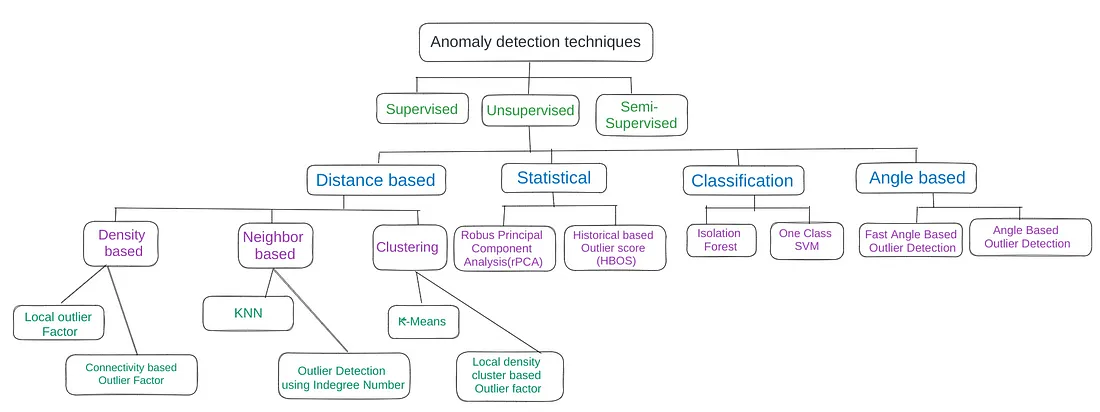


Statistical methods:
Z-Score/Standard Score: This method measures how many standard deviations a data point is away from the mean. Points that fall far from the mean are considered anomalies.
Percentiles: Identifying anomalies based on percentiles or quantiles, where values below or above a certain threshold are considered outliers.
Machine learning algorithms:
Isolation Forest: An ensemble learning method that builds a tree structure to isolate anomalies efficiently.
One-Class SVM: A support vector machine (SVM) model trained to classify data points as normal or outliers.
K-Nearest Neighbors (KNN): Assigns an anomaly score based on the distance to the K-nearest neighbors, with distant points being potential anomalies.
Autoencoders: Neural networks designed to learn a compressed representation of data, where reconstruction error can be used to identify anomalies.
Clustering methods:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Clusters data points based on their density, with points that do not belong to any cluster considered outliers.
K-Means Clustering: Data points that do not belong to well-defined clusters may be considered anomalies.
Time-series analysis:
Moving Averages: Identifying anomalies based on deviations from the moving average or exponential moving average.
Seasonal Decomposition: Decomposing a time series into its trend, seasonal, and residual components, with anomalies often detected in the residual component.
Proximity-based approaches:
Mahalanobis Distance: Measures the distance of data points from the center of the data distribution, considering correlations between features.
Local Outlier Factor (LOF): Computes the local density deviation of a data point compared to its neighbors, identifying regions of different densities.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clever way to find unusual or outlier data points in a group of data. Imagine you have a bunch of points on a map, and you want to find the weird ones that don’t really fit into any group.

Here’s how DBSCAN works:

Step 1: Select a starting point

Begin by randomly selecting a data point from your dataset.
Step 2: Define a radius (Epsilon) and minimum number of oints (Min_Samples)

Specify two important values:

Epsilon (a radius around the selected point).
Min_Samples (the minimum number of data points that should be within this radius to form a cluster)
Step 3: Check neighboring points

Examine all data points within the defined radius (Epsilon) around the selected point.
Step 4: Form a cluster

If there are at least as many data points within the Epsilon radius as specified by Min_Samples, consider the selected point and these nearby points as a cluster.
Step 5: Expand the cluster

Now, for each point within this newly formed cluster, repeat the process. Check for nearby points within the Epsilon radius.
If additional points are found, add them to the cluster. This process continues iteratively, expanding the cluster until no more points can be added.
Step 6: Identify outliers (noise)

Any data points that are not included in any cluster after the expansion process are labeled as outliers or noise. These points do not belong to any cluster.
Imagine you have a field with a bunch of people scattered around, and you want to organize a game of tag. Some people are standing close together, and others are standing alone. DBSCAN helps you identify two things:

Groups of Players: It starts by picking a person, any person, and puts an imaginary hula hoop around them (this is like setting a maximum distance). Now, it checks how many other people are inside that hula hoop. If there are enough (more than a certain number you decide in advance), it forms a group. This group is like a team of players playing tag.
Lonely Players: After forming that group, it picks a person within that group, puts a hula hoop around them, and checks if there are more people inside. If yes, it adds them to the group. This process continues until there are no more people to add to that group.
Now, here’s the cool part: Anyone who doesn’t end up in a group is the outlier or the “lonely player.” These are the people who don’t belong to any team, or in data terms, they are the outliers.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [2]:
# Create a synthetic dataset with normal and anomalous data points
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=2, random_state=42, cluster_std=1.0)
anomalies = np.array([[5, 5], [6, 6], [7, 7]])

In [ ]:
# Combine the normal data and anomalies
X = np.vstack([X, anomalies])


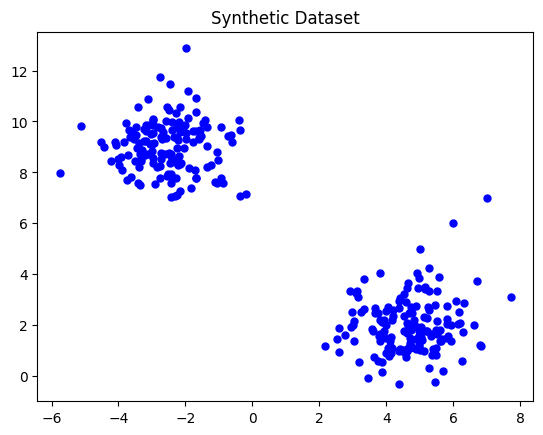

In [4]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=25)
plt.title("Synthetic Dataset")
plt.show()

In [5]:
# Apply DBSCAN for anomaly detection with increased epsilon
dbscan = DBSCAN(eps=1, min_samples=41)  # Increase eps
labels = dbscan.fit_predict(X)

# Anomalies are considered as points with label -1
anomalies = X[labels == -1]

In [6]:
# Anomalies are considered as points with label -1
anomalies = X[labels == -1]

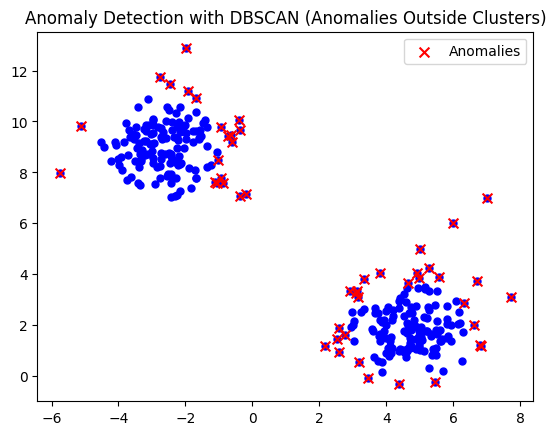

In [7]:
# Visualize the anomalies
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=25)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='x', s=50, label='Anomalies')
plt.title("Anomaly Detection with DBSCAN (Anomalies Outside Clusters)")
plt.legend()
plt.show()

In [8]:
# Print the identified anomalies
print("Identified Anomalies:")
print(anomalies)

Identified Anomalies:
[[ 4.92965369  4.04857048]
 [ 3.10576467  3.25084651]
 [ 4.98163481  3.84934052]
 [-0.64342311  9.48811905]
 [-0.36525353  9.64820515]
 [-1.10640331  7.61243507]
 [ 6.79306129  1.20582212]
 [-1.92234053 11.20474175]
 [ 6.60460397  2.00843324]
 [ 2.51598311  1.44741466]
 [-0.62301172  9.18886394]
 [ 3.16129259  3.11692373]
 [ 4.65829722  3.649607  ]
 [-0.92318081  7.77647063]
 [ 4.36482714 -0.32875148]
 [ 3.31964563  3.80462845]
 [ 5.2726607   4.24386254]
 [-0.19453906  7.14702094]
 [-1.03130358  8.49601591]
 [ 2.92674431  3.32704206]
 [ 3.82165815  4.06555696]
 [ 5.56605638  3.88258632]
 [-5.75046496  7.98989849]
 [ 6.82968177  1.1648714 ]
 [-0.92998481  9.78172086]
 [-1.68713746 10.91107911]
 [-5.12894273  9.83618863]
 [-0.38704143 10.04675139]
 [ 3.19179449  0.56570591]
 [ 2.16823434  1.17627443]
 [ 6.70062676  3.72851053]
 [-1.99414994 12.86701762]
 [-0.87678632  7.58414475]
 [ 7.71875964  3.0927446 ]
 [-0.74374338  9.41926784]
 [ 2.57243674  1.88404964]
 [ 3.1